In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-26 10:08:05.871765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone13_I_data1 dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/iPhone13_I_data1/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallary_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0234375+0.0078125j 0.015625 +0.0078125j 0.0234375+0.j        ...
 0.0234375+0.015625j  0.015625 +0.j        0.0078125+0.j       ]
2048
83750
(2048, 83750)
[0.01833543 0.00961571 0.00367982 ... 0.00215231 0.00389023 0.00958879]
0
(10000, 2048)
(10000,)
[0.03125 +0.0078125j 0.03125 +0.015625j  0.015625+0.015625j  ...
 0.015625+0.015625j  0.015625+0.j        0.015625+0.j       ]
2048
84262
(2048, 84262)
[0.01871342 0.00962076 0.00392026 ... 0.00172973 0.00385315 0.00959814]
1
(20000, 2048)
(20000,)
[0.015625 +0.0078125j 0.       +0.0078125j 0.0234375+0.015625j  ...
 0.015625 +0.0078125j 0.       -0.0078125j 0.015625 +0.0078125j]
2048
83224
(2048, 83224)
[0.01831909 0.00954875 0.00370389 ... 0.0018516  0.0036198  0.00960332]
2
(30000, 2048)
(30000,)
[0.0078125+0.0078125j 0.03125  +0.j        0.0078125+0.0078125j ...
 0.015625 +0.j        0.0234375+0.0078125j 0.015625 +0.015625j ]
2048
80898
(2048, 80898)
[0.01839363 0.00966465 0.00364197 ... 0.00196357 0.00373289 0.00969818]
3
(40000, 2

## Cross-model Validation

## iPhone13_I model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_model.h5")
model.summary()

2023-02-23 11:40:39.139746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 5ms/step - loss: 8.9448 - accuracy: 0.0470
test loss, test acc: [8.94483757019043, 0.046959999948740005]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 16s 5ms/step
[[   2 1656 2714    0    2    0 5623    0    3    0]
 [   1  356    1    1  142 8876    2    0  621    0]
 [   0   37    0    0  176 6869    1    0 2917    0]
 [   2  151    1    0   71 8787    2    1  985    0]
 [   1    0    0    0    1 9172    1    0  825    0]
 [   3  721 4650  292    0 4334    0    0    0    0]
 [   1  462 3521 1252    0 4762    1    0    1    0]
 [   1  550    6    5   10 9188    1    1  238    0]
 [   1    0    1 3432    0 6564    1    0    1    0]
 [   3 1300 1428  987    0 6279    1    0    2    0]]
              precision    recall  f1-score   support

           0       0.13      0.00      0.00     10000
           1       0.07      0.04      0.05     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.07      0.43      0.12     10000
           6       0.00      0.0

Test Accuracy:0.04696


Text(0.5, 1.0, 'Accuracy:0.047')

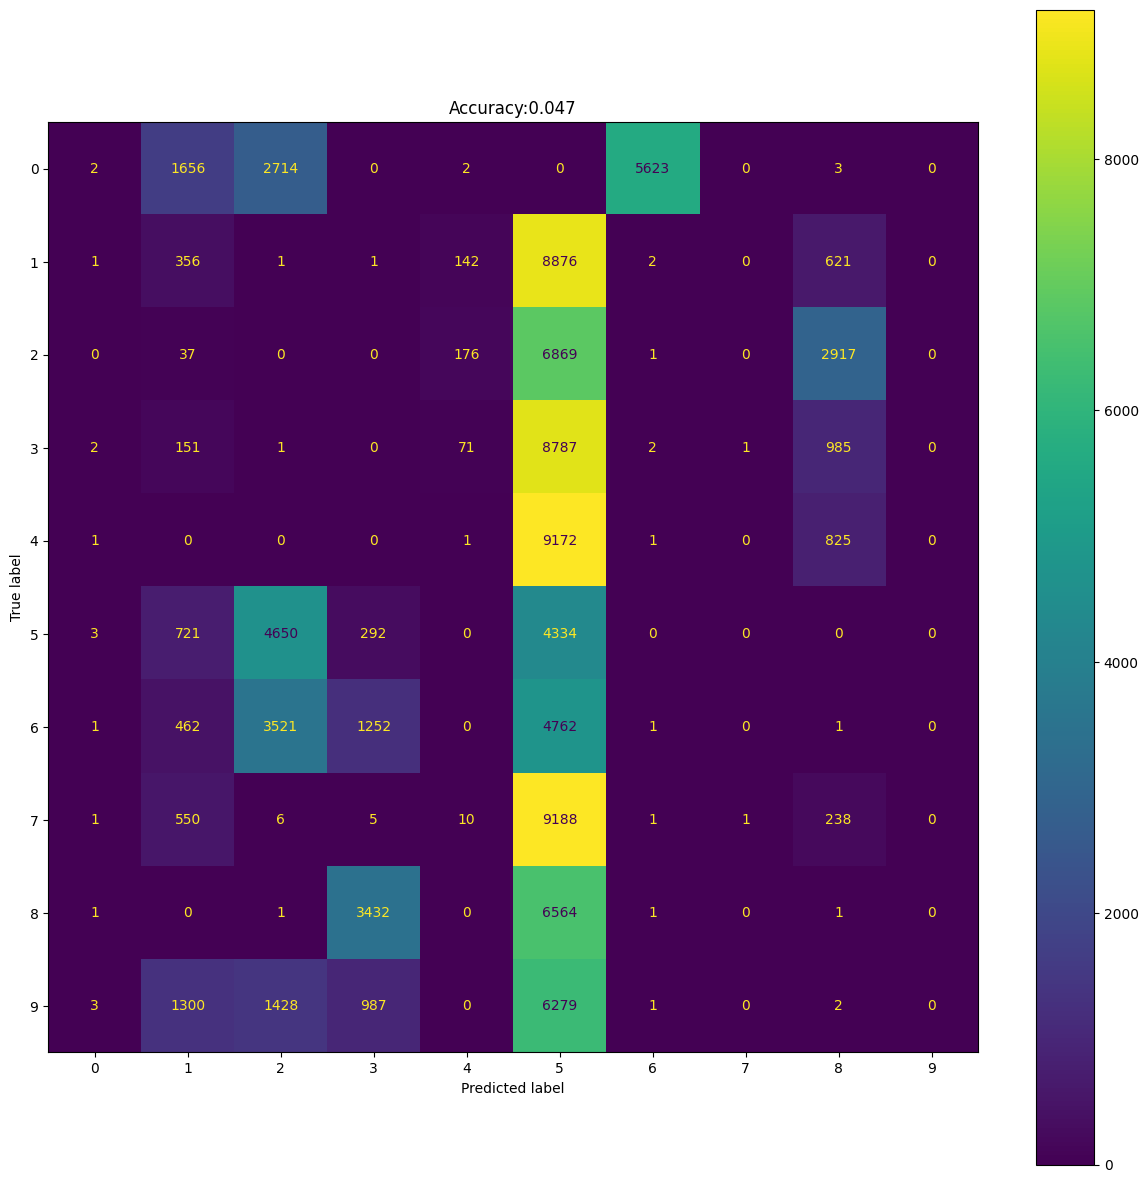

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.9422 - accuracy: 0.3774
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.0143 - accuracy: 0.5801
Epoch 3/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.9393 - accuracy: 0.6172
Epoch 4/30
3125/3125 [==============================] - 17s 6ms/step - loss: 0.8982 - accuracy: 0.6381
Epoch 5/30
3125/3125 [==============================] - 21s 7ms/step - loss: 0.8691 - accuracy: 0.6524
Epoch 6/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.8470 - accuracy: 0.6670
Epoch 7/30
3125/3125 [==============================] - 20s 6ms/step - loss: 0.8288 - accuracy: 0.6754
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.8138 - accuracy: 0.6834
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8016 - accuracy: 0.6897
Epoch 10/30
3125/3125 [==============================] - 14s 5ms/step - l

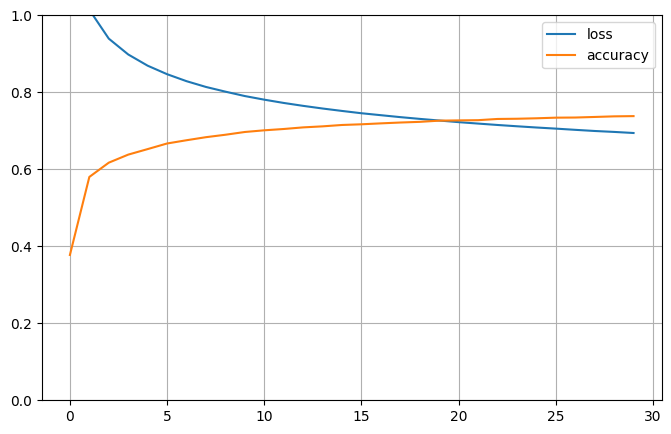

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.6948 - accuracy: 0.7359
test loss, test acc: [0.6948280334472656, 0.7359499931335449]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[9972    2    0    6    0   20    0    0    0    0]
 [   5 6095  949 1261   61  209    5 1351    5   59]
 [   2  891 6908  789  849    2    0  554    5    0]
 [   4 1751 1206 5937  112  141    4  835    9    1]
 [   4    6  439   25 9190    0    1  106  229    0]
 [   6   60    0    4    0 7580 1238  334    7  771]
 [   5   22    0    1    0 3415 4807  499   72 1179]
 [   5 1543  513  345  110  500  239 6385   91  269]
 [   2    0    0    0  299    2   37   34 9604   22]
 [   6   85    0    0    1 1267  882  598   44 7117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.58      0.61      0.60     10000
           2       0.69      0.69      0.69     10000
           3       0.71      0.59      0.65     10000
           4       0.87      0.92      0.89     10000
           5       0.58      0.76      0.66     10000
           6       0.67      0.4

Test Accuracy:0.73595


Text(0.5, 1.0, 'Accuracy:0.736')

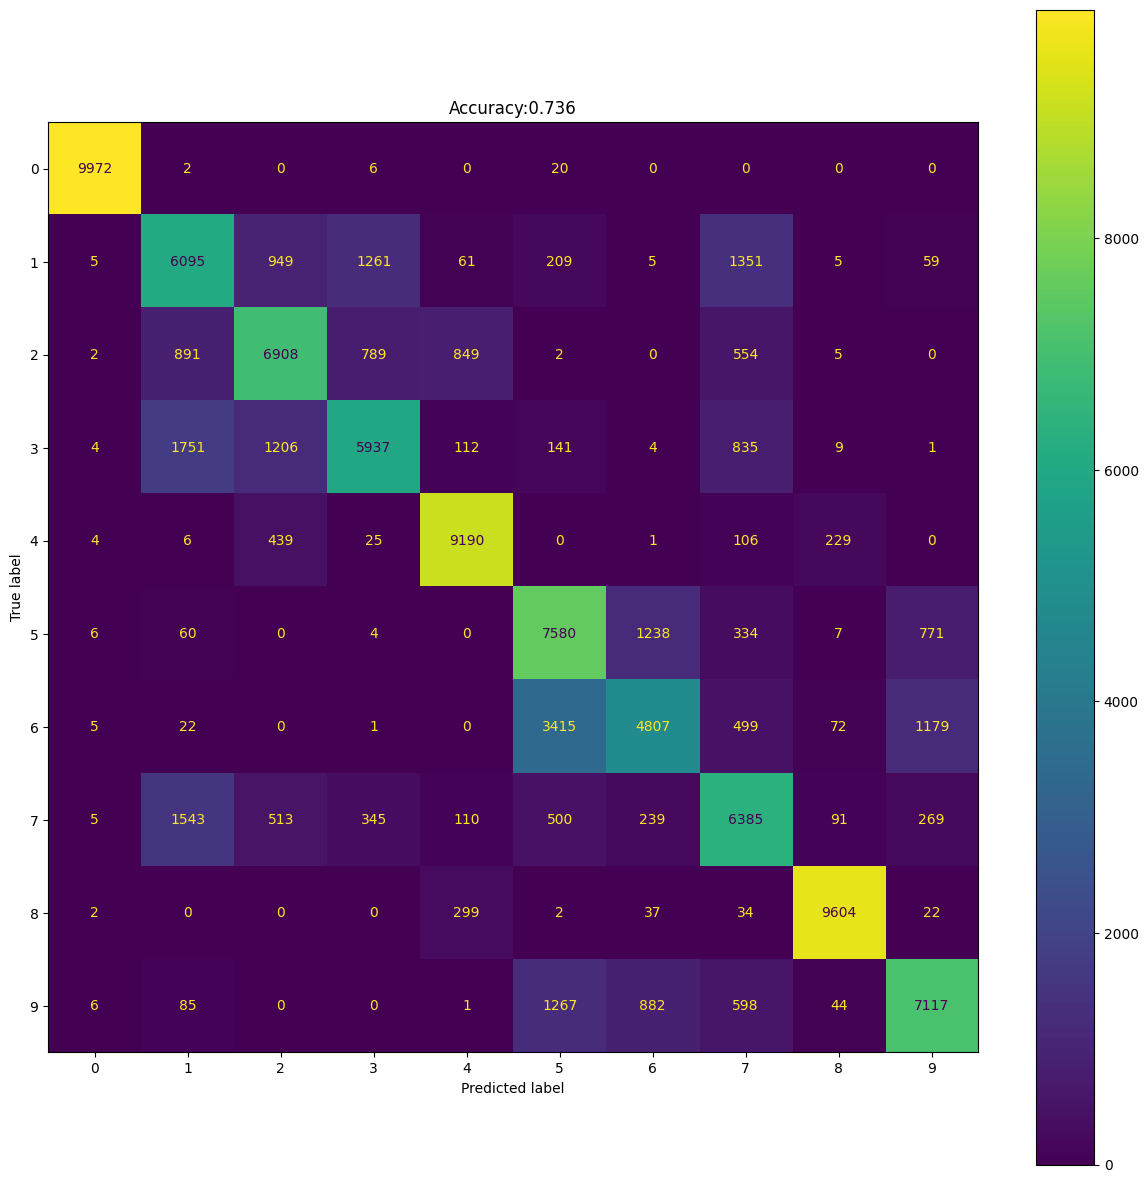

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(ii) model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5")
model.summary()

2023-02-26 10:16:21.066823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 8.8425 - accuracy: 0.1325
test loss, test acc: [8.842467308044434, 0.13249999284744263]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[   0   27    0   15 1104    1    0    1    0 8852]
 [   0 1454    3    1 4991 3325   39   95    0   92]
 [   0  202    9    0 4752 2742  478 1813    0    4]
 [   2 2538   51    5 5942  810   90  558    0    4]
 [   1   12    0    0    6 2087 4472 3381   38    3]
 [   1    0    0    0   49 6959  957    5    0 2029]
 [   0    0    0    0    3 5844 3882    9    0  262]
 [   1  697    0    0  584 8558   12  117    0   31]
 [   0    2    0    0    0 4481 5156  261   99    1]
 [   1   30    0    0  619 8591   33    7    0  719]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.29      0.15      0.19     10000
           2       0.14      0.00      0.00     10000
           3       0.24      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.16      0.70      0.26     10000
           6       0.26      0.3

Test Accuracy:0.1325


Text(0.5, 1.0, 'Accuracy:0.133')

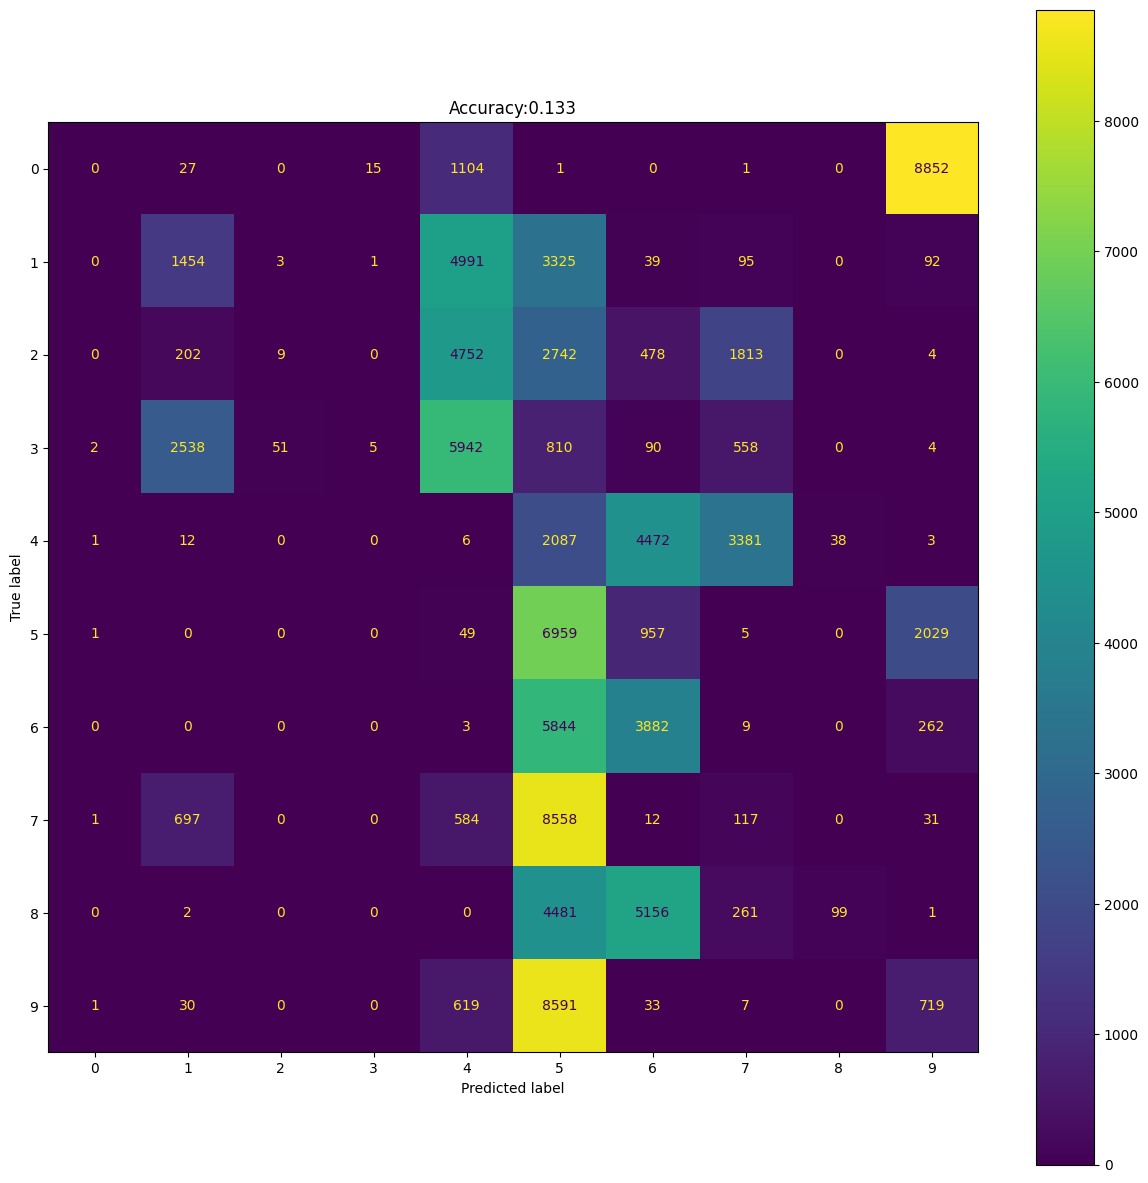

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [10]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 4ms/step - loss: 0.5644 - accuracy: 0.7881
Epoch 2/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5628 - accuracy: 0.7886
Epoch 3/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.5610 - accuracy: 0.7891
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5595 - accuracy: 0.7900
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5580 - accuracy: 0.7908
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5567 - accuracy: 0.7915
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5551 - accuracy: 0.7915
Epoch 8/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5539 - accuracy: 0.7926
Epoch 9/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.5524 - accuracy: 0.7927
Epoch 10/30
3125/3125 [==============================] - 16s 5ms/step - l

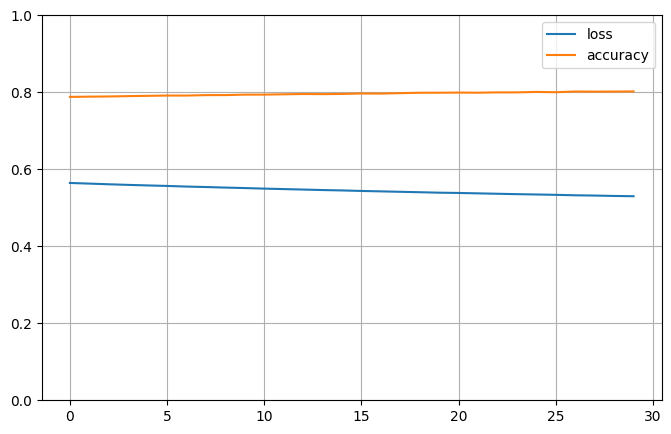

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.5295 - accuracy: 0.8023
test loss, test acc: [0.5294778347015381, 0.8023499846458435]


In [13]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[9952   16    0   10    0   16    0    3    0    3]
 [  19 6655  977 1031    9   53    1  775    0  480]
 [   1 1118 7025 1066  317   45    5  325    4   94]
 [   3 1322 1184 7343    6    2    0  138    0    2]
 [   3    7  148    4 9110    6   50   10  659    3]
 [   7    6   29    0    6 7479 1497   36    9  931]
 [   2    0    5    1   34 1104 8702    3   74   75]
 [   2 1224  455  160   33   91    3 7115    5  912]
 [   2    2   16    0  864    0  110   13 8990    3]
 [  15  407  109    1    4 1005   71  522    2 7864]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10000
           1       0.62      0.67      0.64     10000
           2       0.71      0.70      0.70     10000
           3       0.76      0.73      0.75     10000
           4       0.88      0.91      0.89     10000
           5       0.76      0.75      0.76     10000
           6       0.83      0.8

Test Accuracy:0.80235


Text(0.5, 1.0, 'Accuracy:0.802')

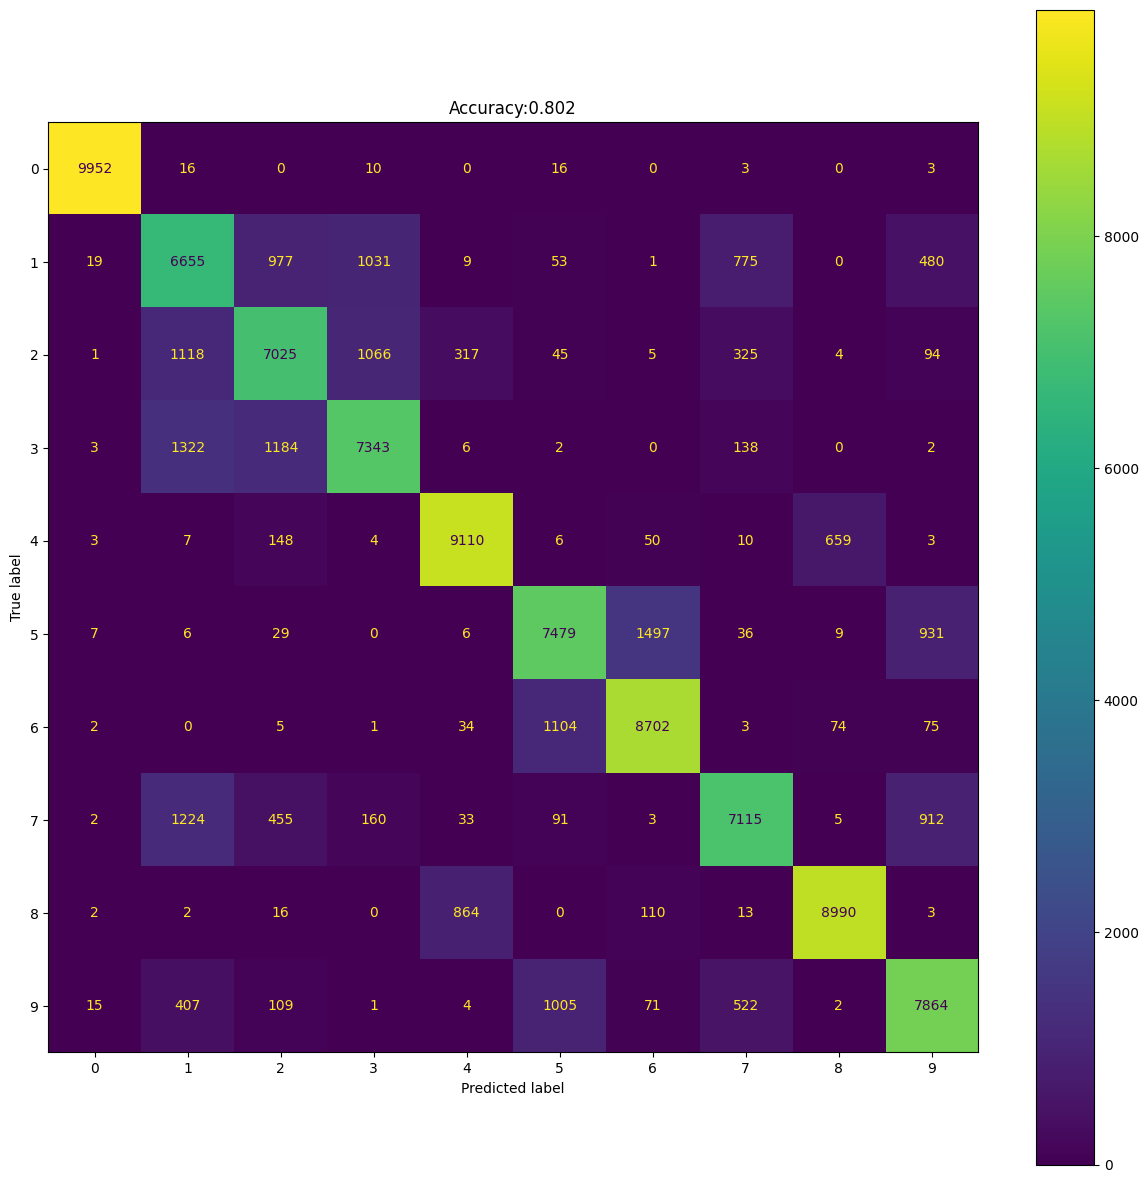

In [14]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(iii) model

Cross-model Validation without training

In [15]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [16]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 5.7020 - accuracy: 0.0579
test loss, test acc: [5.702001094818115, 0.05793000012636185]


In [17]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[   0    2 1299 8697    0    0    0    0    0    2]
 [ 597 1685 2658 4568    0    1  489    1    0    1]
 [ 250 5740 1476 1533    1    4  996    0    0    0]
 [  48 6808 1944 1121    0    1   78    0    0    0]
 [ 198 2916   70   44   10   90 6671    0    0    1]
 [1886   18   46 7701    0    2  338    9    0    0]
 [3972   18   39 4461    0   10 1493    7    0    0]
 [1607  225  317 7417    0    7  421    5    0    1]
 [ 907    4    0    3    1 8492  561   32    0    0]
 [7027    4   18 2598    0    2   39  311    0    1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.10      0.17      0.12     10000
           2       0.19      0.15      0.17     10000
           3       0.03      0.11      0.05     10000
           4       0.83      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.13      0.1

Test Accuracy:0.05793


Text(0.5, 1.0, 'Accuracy:0.058')

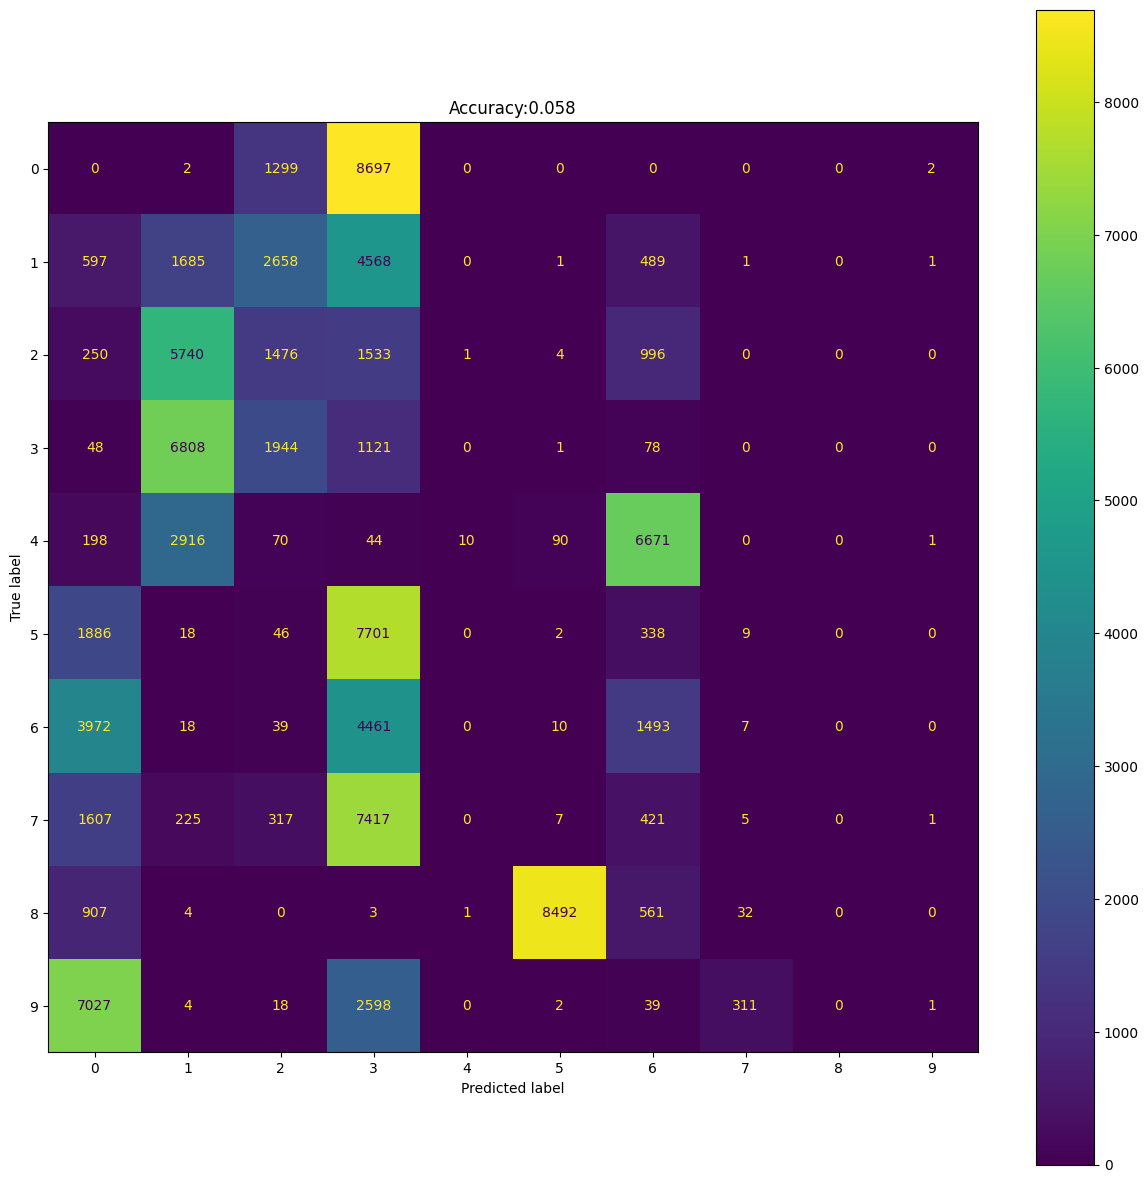

In [18]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [19]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.6477 - accuracy: 0.4302
Epoch 2/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.0168 - accuracy: 0.6080
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.9358 - accuracy: 0.6404
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8943 - accuracy: 0.6580
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8682 - accuracy: 0.6682
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8500 - accuracy: 0.6758
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8359 - accuracy: 0.6811
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.8250 - accuracy: 0.6862
Epoch 9/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.8158 - accuracy: 0.6893
Epoch 10/30
3125/3125 [==============================] - 16s 5ms/step - l

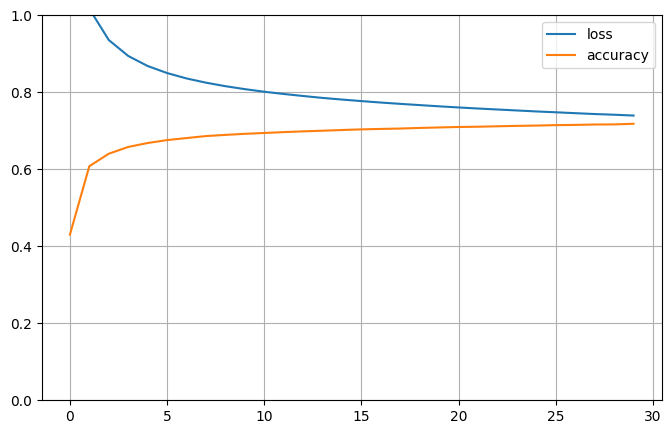

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.7376 - accuracy: 0.7189
test loss, test acc: [0.737610936164856, 0.7189300060272217]


In [23]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[9690  116    2   42    0  112    1   34    0    3]
 [ 245 5327 1693  813  194  270  286 1147    1   24]
 [  19 1392 5417 1801  822   20   78  443    7    1]
 [  28  760 2125 6788   83    2    3  210    1    0]
 [   1   50  766   17 8772    0  170   91  128    5]
 [ 131  510   51    4   29 5359 1853 1197   13  853]
 [  25  355   64    1  179 1578 6389  627   59  723]
 [ 112  914  304   84   74  872  770 6324   31  515]
 [   1    0    0    0  119    0   39    6 9782   53]
 [  10   44    1    1    7  649  622  566   55 8045]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10000
           1       0.56      0.53      0.55     10000
           2       0.52      0.54      0.53     10000
           3       0.71      0.68      0.69     10000
           4       0.85      0.88      0.87     10000
           5       0.60      0.54      0.57     10000
           6       0.63      0.6

Test Accuracy:0.71893


Text(0.5, 1.0, 'Accuracy:0.719')

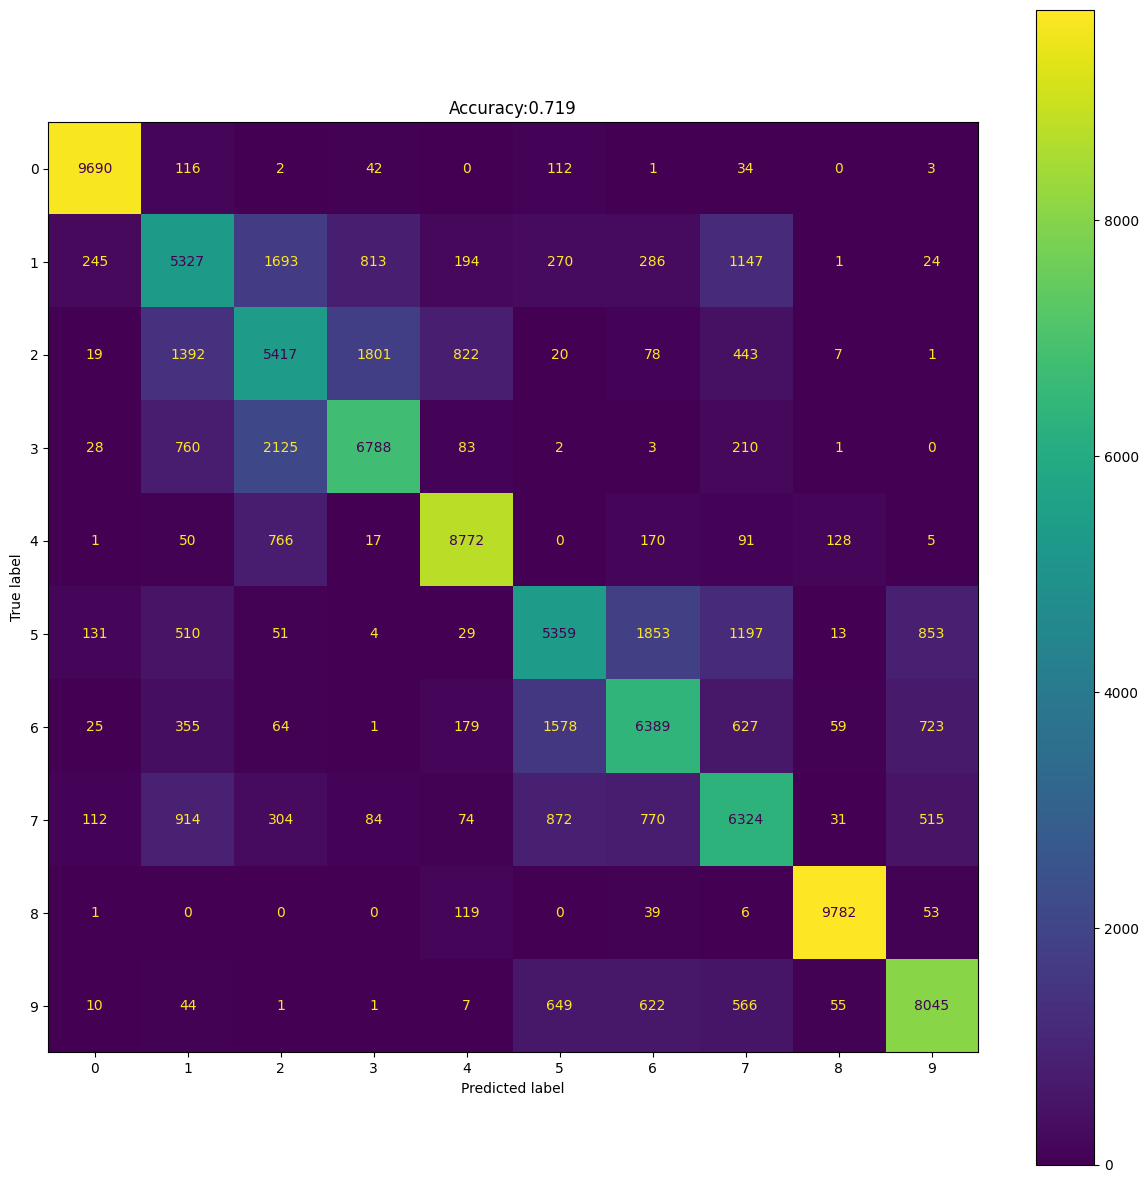

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_BeSh model

Cross-model Validation without training

In [25]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [26]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 16.9839 - accuracy: 0.1644
test loss, test acc: [16.983922958374023, 0.16440999507904053]


In [27]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[   2 9171    0    0    8    1  815    0    3    0]
 [   0    1    3    0   18    1    2 8412    0 1563]
 [   0    0  192    0    3    0    1 9743    0   61]
 [   0    1    0    0  154    0    1 9654    2  188]
 [   1    1 8011    0    0    0    1 1940    1   45]
 [   0  131    0    0   15    0    2   37    2 9813]
 [   0   20    2    0    5    1    0   92    2 9878]
 [   0    1    0    0    6    1    0 7258    1 2733]
 [   0    0 9311    0    0    1    1  581    0  106]
 [   0    4   11    0    5    0    1  990    1 8988]]
              precision    recall  f1-score   support

           0       0.67      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.01      0.02      0.01     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.16441


Text(0.5, 1.0, 'Accuracy:0.164')

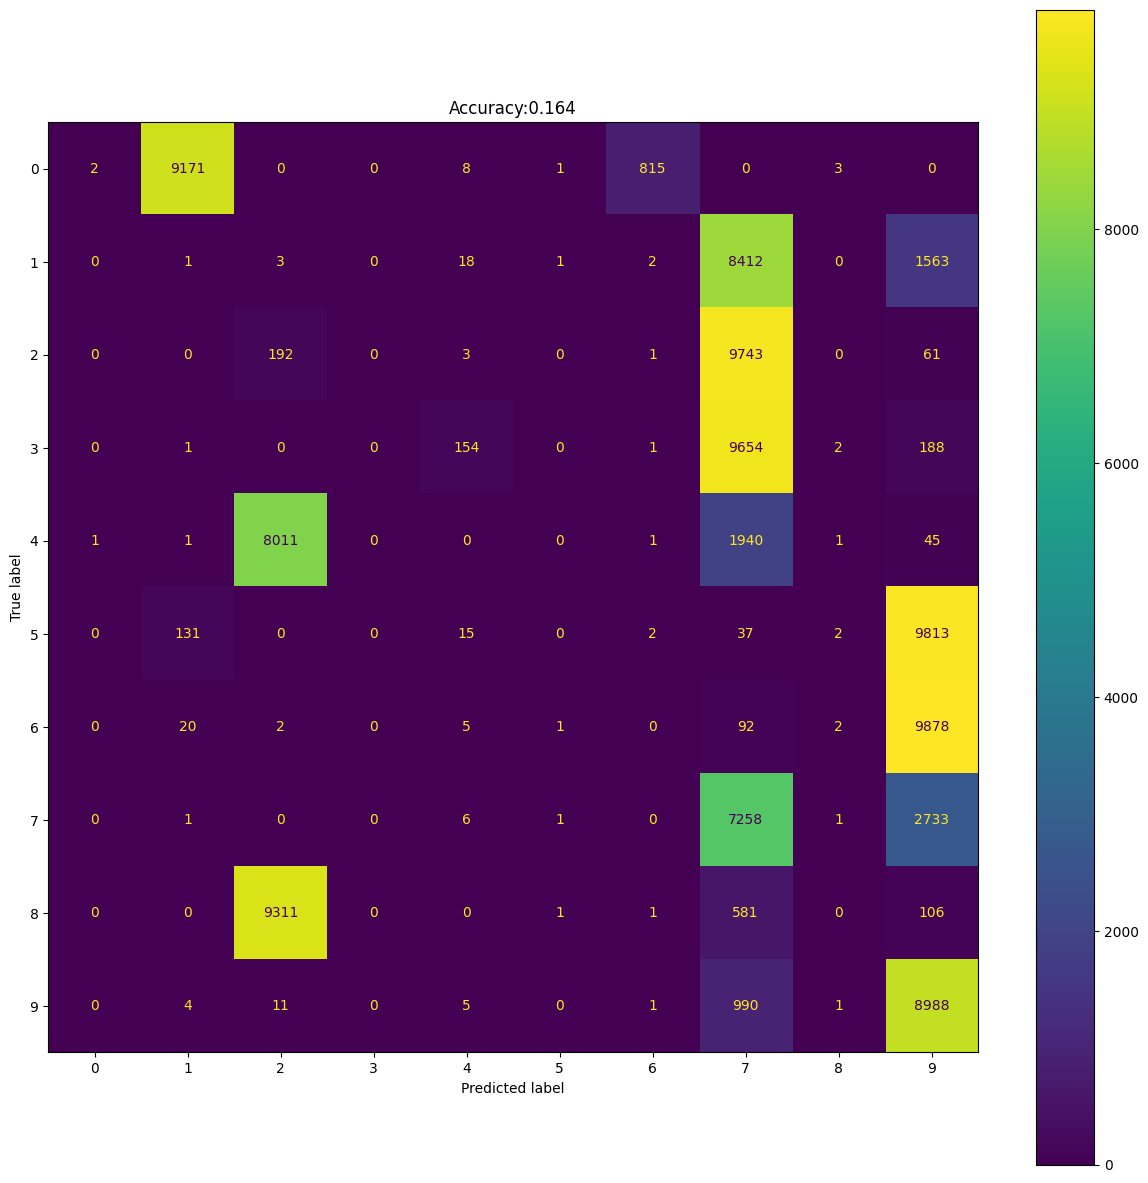

In [28]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [29]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [30]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.8070 - accuracy: 0.3794
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.1474 - accuracy: 0.5157
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0733 - accuracy: 0.5526
Epoch 4/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.0305 - accuracy: 0.5765
Epoch 5/30
3125/3125 [==============================] - 18s 6ms/step - loss: 1.0019 - accuracy: 0.5915
Epoch 6/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9801 - accuracy: 0.6029
Epoch 7/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.9615 - accuracy: 0.6130
Epoch 8/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.9484 - accuracy: 0.6180
Epoch 9/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.9356 - accuracy: 0.6265
Epoch 10/30
3125/3125 [==============================] - 17s 5ms/step - l

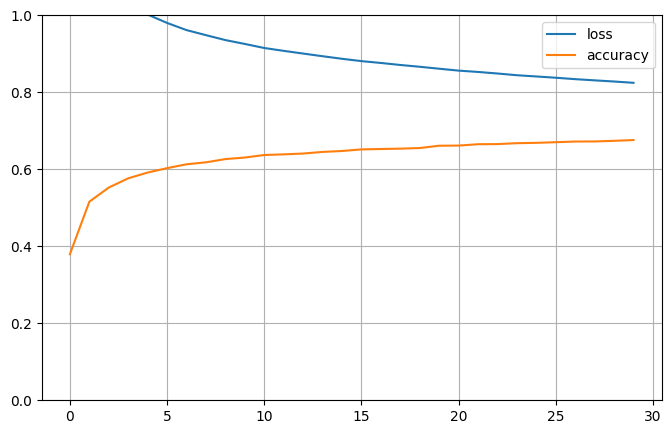

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [32]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 0.8392 - accuracy: 0.6657
test loss, test acc: [0.8391681909561157, 0.6657099723815918]


In [33]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 19s 6ms/step
[[9939    0    0    4    0   57    0    0    0    0]
 [   5 5985 1153  782   27  401    5 1463    0  179]
 [   1  810 7123  351  849    1    0  839   10   16]
 [   3 2061 1055 6501    2   57    0  318    0    3]
 [   4    1  507   12 8237    1    0   33 1196    9]
 [  13   74    0    6    0 9139  296   50    0  422]
 [   3   62    1    1    3 6174 1900  176    3 1677]
 [   3 2453 1251  275   79  509   35 4934    3  458]
 [   2    0  112    5 1337    1    0   19 8506   18]
 [   5  514   82   20   30 3429  777  813   23 4307]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10000
           1       0.50      0.60      0.55     10000
           2       0.63      0.71      0.67     10000
           3       0.82      0.65      0.72     10000
           4       0.78      0.82      0.80     10000
           5       0.46      0.91      0.61     10000
           6       0.63      0.1

Test Accuracy:0.66571


Text(0.5, 1.0, 'Accuracy:0.666')

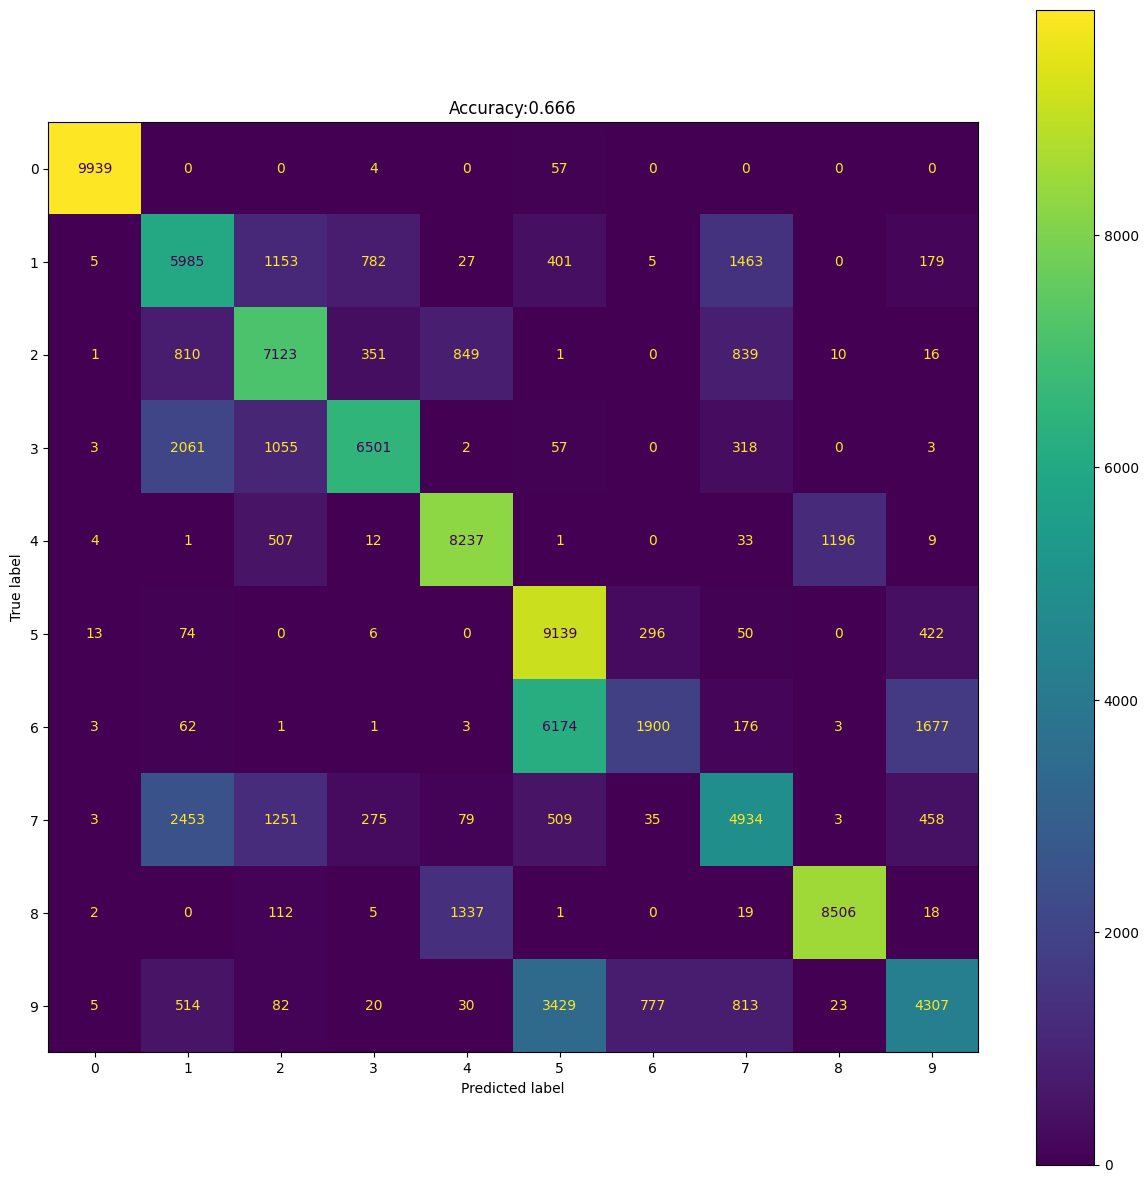

In [34]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data2 model

Cross-model Validation without training

In [41]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [42]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 6.8560 - accuracy: 0.1312
test loss, test acc: [6.855987548828125, 0.13116000592708588]


In [43]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[2275    9    0 2554    1 4642    0    0  519    0]
 [   9 8287  335   11   81    0   42    2 1224    9]
 [   1 8617  395    1   21    0  856    0  108    1]
 [   1 4316  547    1    0    5 2135    0 1742 1253]
 [   1  424   84    1    1    1 9200    0  278   10]
 [  44  106  231 2123    0 1411    0    0 2598 3487]
 [  12 1502  320  714    2   16    1    0 6979  454]
 [  67 1868 6057  141   17    3   38    1 1326  482]
 [   1    0  259    1    0    0  635    0    3 9101]
 [   2  309  516 6586    1    0    0    0 1845  741]]
              precision    recall  f1-score   support

           0       0.94      0.23      0.37     10000
           1       0.33      0.83      0.47     10000
           2       0.05      0.04      0.04     10000
           3       0.00      0.00      0.00     10000
           4       0.01      0.00      0.00     10000
           5       0.23      0.14      0.18     10000
           6       0.00      0.0

Test Accuracy:0.13116


Text(0.5, 1.0, 'Accuracy:0.131')

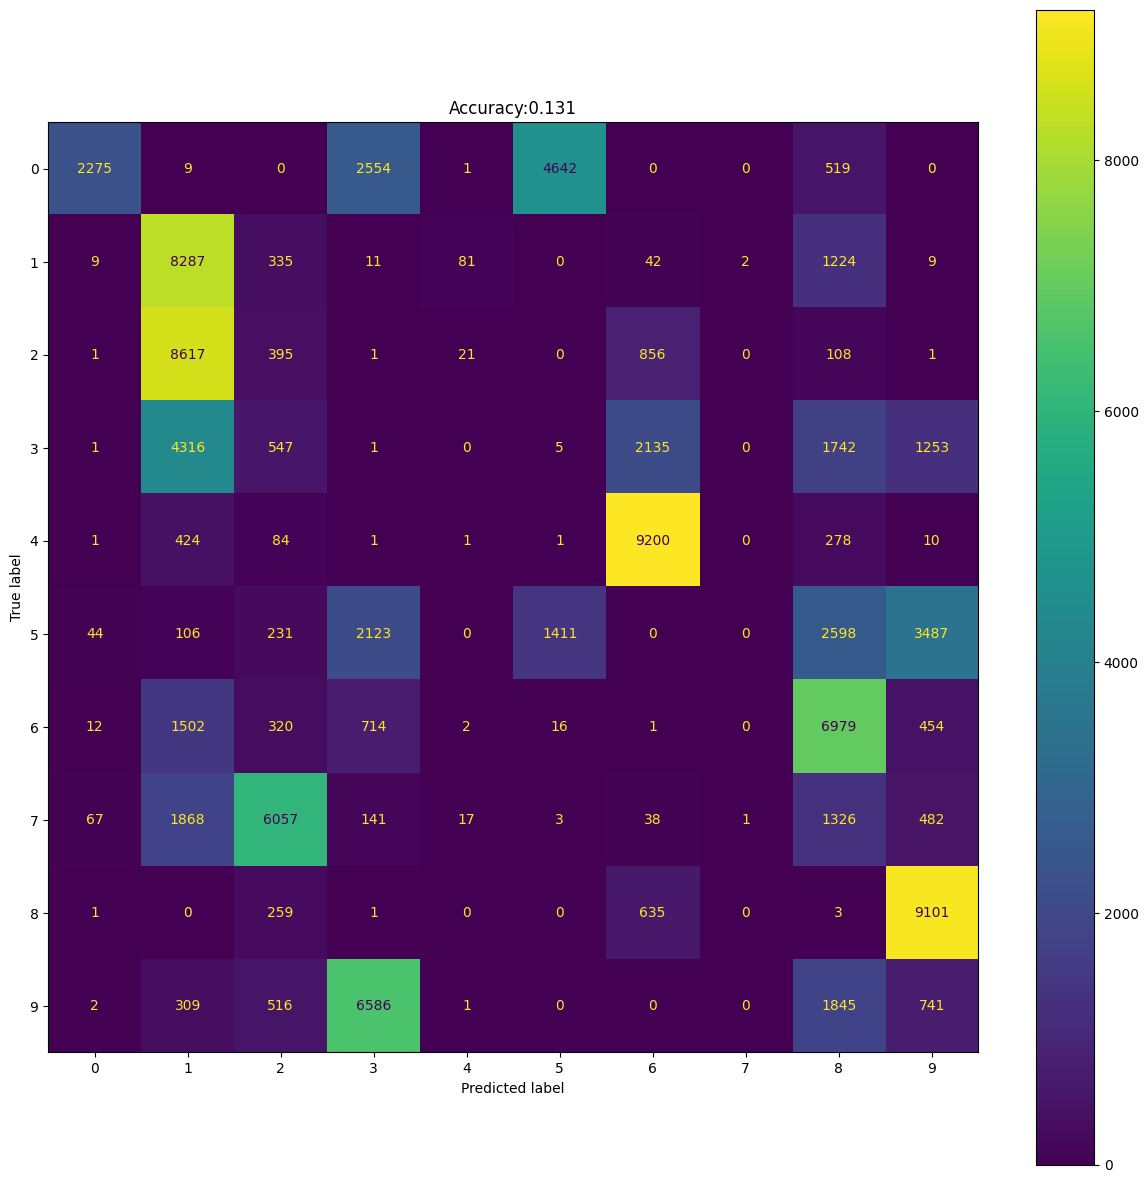

In [44]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [45]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [46]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 19s 6ms/step - loss: 1.6908 - accuracy: 0.5184
Epoch 2/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6695 - accuracy: 0.7783
Epoch 3/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.5717 - accuracy: 0.8119
Epoch 4/30
3125/3125 [==============================] - 20s 6ms/step - loss: 0.5257 - accuracy: 0.8260
Epoch 5/30
3125/3125 [==============================] - 21s 7ms/step - loss: 0.4976 - accuracy: 0.8353
Epoch 6/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.4780 - accuracy: 0.8398
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.4636 - accuracy: 0.8442
Epoch 8/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4523 - accuracy: 0.8469
Epoch 9/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.4432 - accuracy: 0.8494
Epoch 10/30
3125/3125 [==============================] - 19s 6ms/step - l

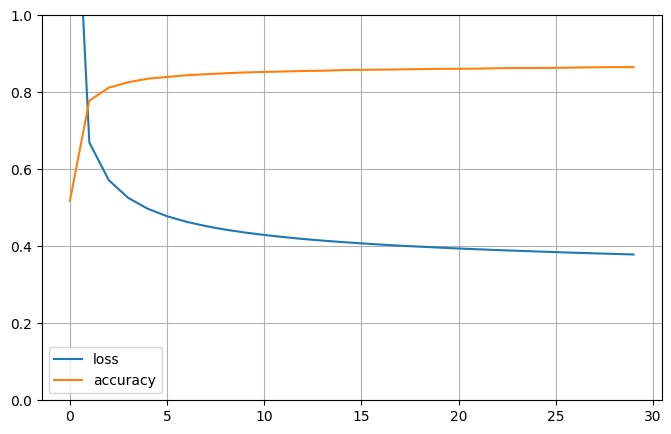

In [47]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [48]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.3779 - accuracy: 0.8655
test loss, test acc: [0.37792426347732544, 0.8655200004577637]


In [49]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[9981    1    0    4    0   14    0    0    0    0]
 [   3 7436  942  296   82    2  545  679    0   15]
 [   1 1029 8073  309  485    0    4   98    0    1]
 [   3  160  271 9146  156   32   43  179   10    0]
 [   2   37  321  117 9452    0    0   26   44    1]
 [  37    1    0   29    0 8443  883  226    4  377]
 [   6  538    1   41    1  754 7310  721    8  620]
 [   2  684   58  178   40  174  705 7970   25  164]
 [   1    0    0    3   62    2    0   12 9917    3]
 [   2   18    0    0    1  290  677  185    3 8824]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10000
           1       0.75      0.74      0.75     10000
           2       0.84      0.81      0.82     10000
           3       0.90      0.91      0.91     10000
           4       0.92      0.95      0.93     10000
           5       0.87      0.84      0.86     10000
           6       0.72      0.7

Test Accuracy:0.86552


Text(0.5, 1.0, 'Accuracy:0.866')

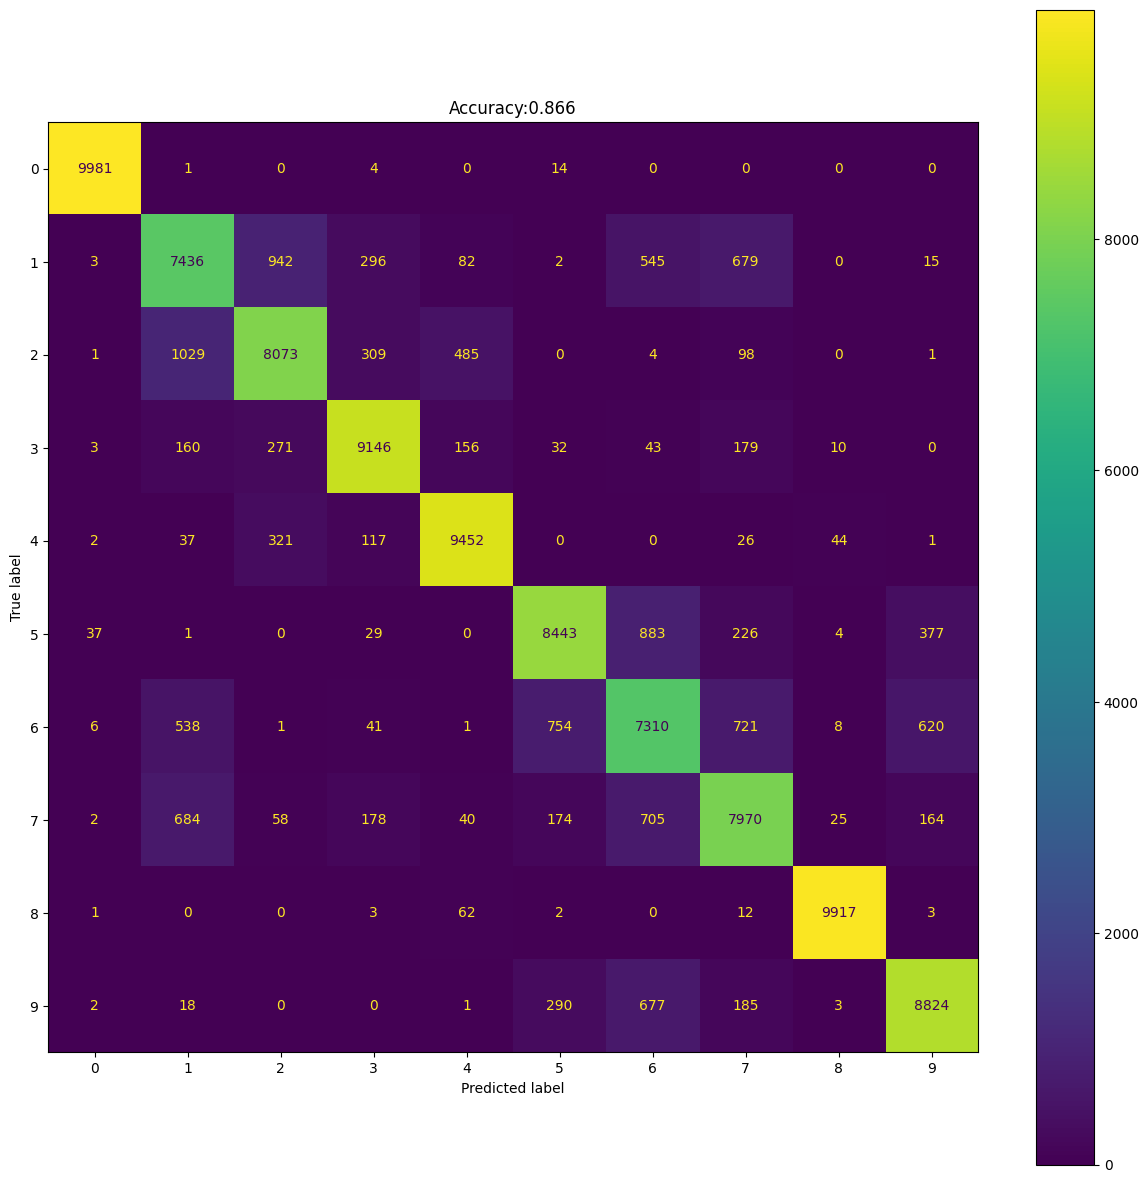

In [50]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_II model

Cross-model Validation without training

In [51]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [52]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 8.8887 - accuracy: 0.1119
test loss, test acc: [8.888650894165039, 0.11193999648094177]


In [53]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[   0    5    0    1    3    2    0    0   20 9969]
 [   1  346    0    3    1 9625    0    0    8   16]
 [   0  452    0    5    1 9532    0    7    2    1]
 [   0 1820    0   24    1 8137    1    0   16    1]
 [   0    2   29    3    1 7320    1 2643    0    1]
 [   1    0    0    0    0 3569 5389    0    0 1041]
 [   0    1    4    1    0 2746 7102    1    0  145]
 [   1   26    0    1    1 9882    7    0    8   74]
 [   1    0 7788    0    0 2165    8   37    0    1]
 [   0    1    2    0    0 2770 7074    0    1  152]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.13      0.03      0.05     10000
           2       0.00      0.00      0.00     10000
           3       0.63      0.00      0.00     10000
           4       0.12      0.00      0.00     10000
           5       0.06      0.36      0.11     10000
           6       0.36      0.7

Test Accuracy:0.11194


Text(0.5, 1.0, 'Accuracy:0.112')

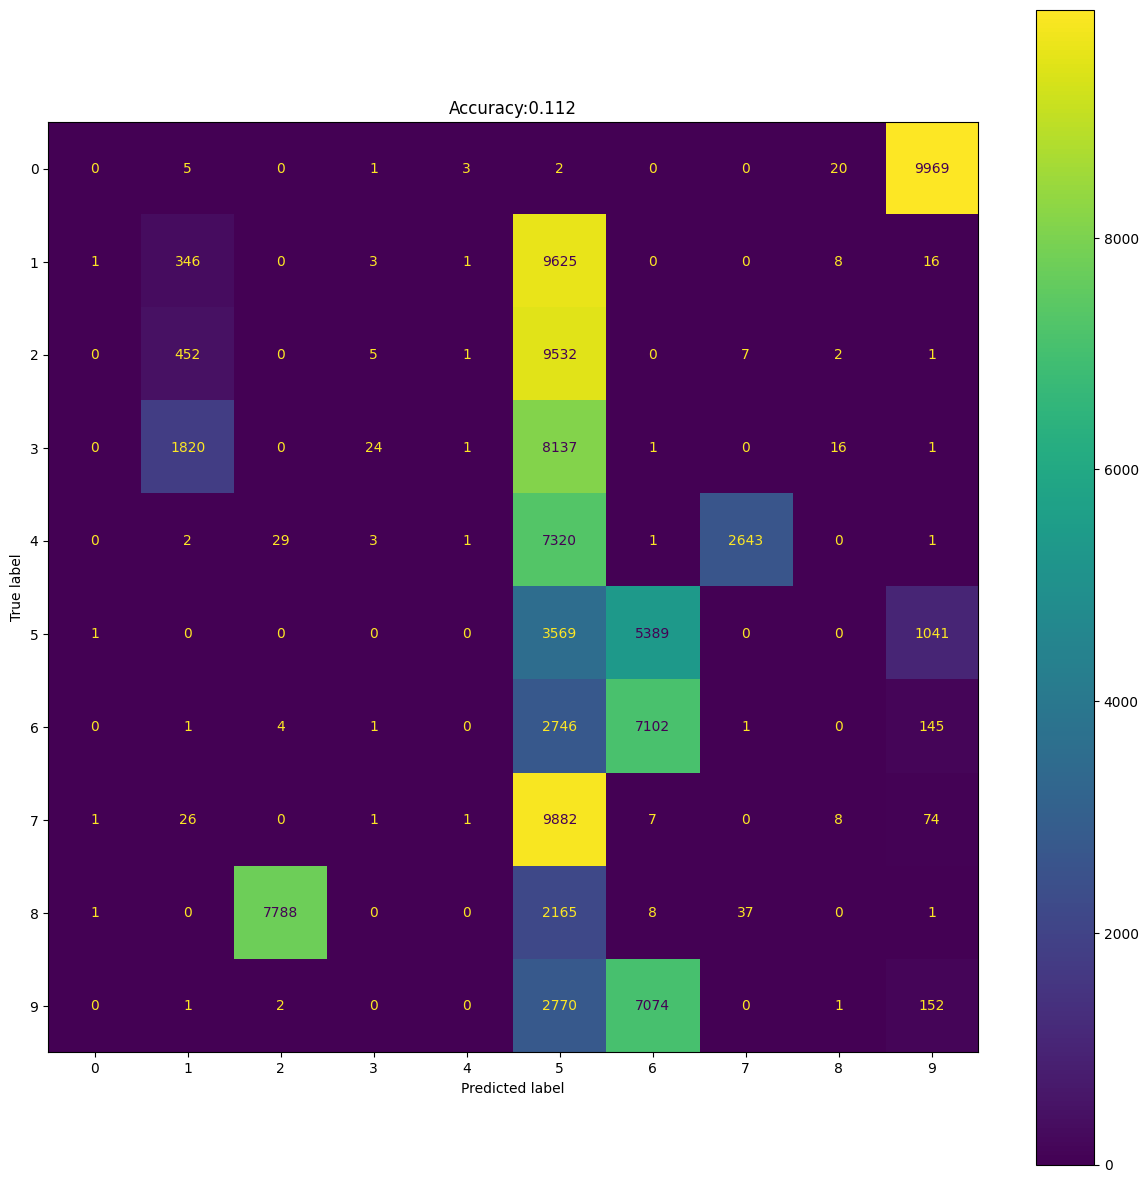

In [54]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [55]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [56]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.6334 - accuracy: 0.4848
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8233 - accuracy: 0.6669
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7485 - accuracy: 0.7090
Epoch 4/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.7084 - accuracy: 0.7255
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.6822 - accuracy: 0.7352
Epoch 6/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.6634 - accuracy: 0.7414
Epoch 7/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6492 - accuracy: 0.7462
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6380 - accuracy: 0.7506
Epoch 9/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.6286 - accuracy: 0.7536
Epoch 10/30
3125/3125 [==============================] - 18s 6ms/step - l

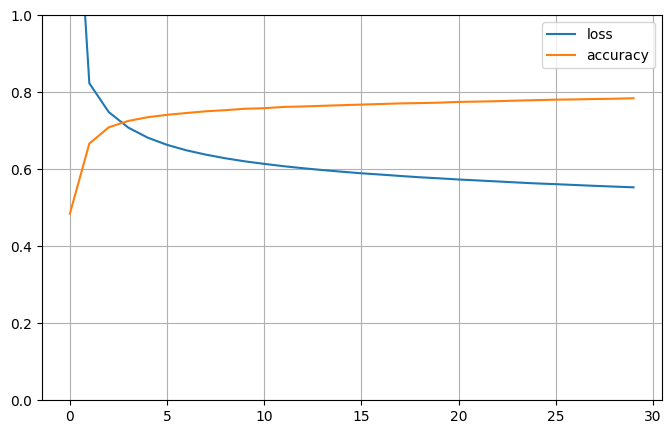

In [57]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [58]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.5523 - accuracy: 0.7844
test loss, test acc: [0.5523213148117065, 0.7844200134277344]


In [59]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[9969    2    0    9    0   18    0    2    0    0]
 [  12 5809 1204 1273   16    8    0 1662    0   16]
 [   1  804 6946 1591  306    1    0  350    1    0]
 [   4 1144 1638 7151   11    0    0   52    0    0]
 [   3    0  238    5 9546    0    6   31  170    1]
 [  10    0    0    0    1 5787 1971  353    2 1876]
 [   3    0    0    1    1  872 8588   75   39  421]
 [   6 1852  514   47   71  231   76 7035    9  159]
 [   2    0    0    0  176    0   46    1 9769    6]
 [   5    1    0    0    0 1091  929  118   14 7842]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.60      0.58      0.59     10000
           2       0.66      0.69      0.68     10000
           3       0.71      0.72      0.71     10000
           4       0.94      0.95      0.95     10000
           5       0.72      0.58      0.64     10000
           6       0.74      0.8

Test Accuracy:0.78442


Text(0.5, 1.0, 'Accuracy:0.784')

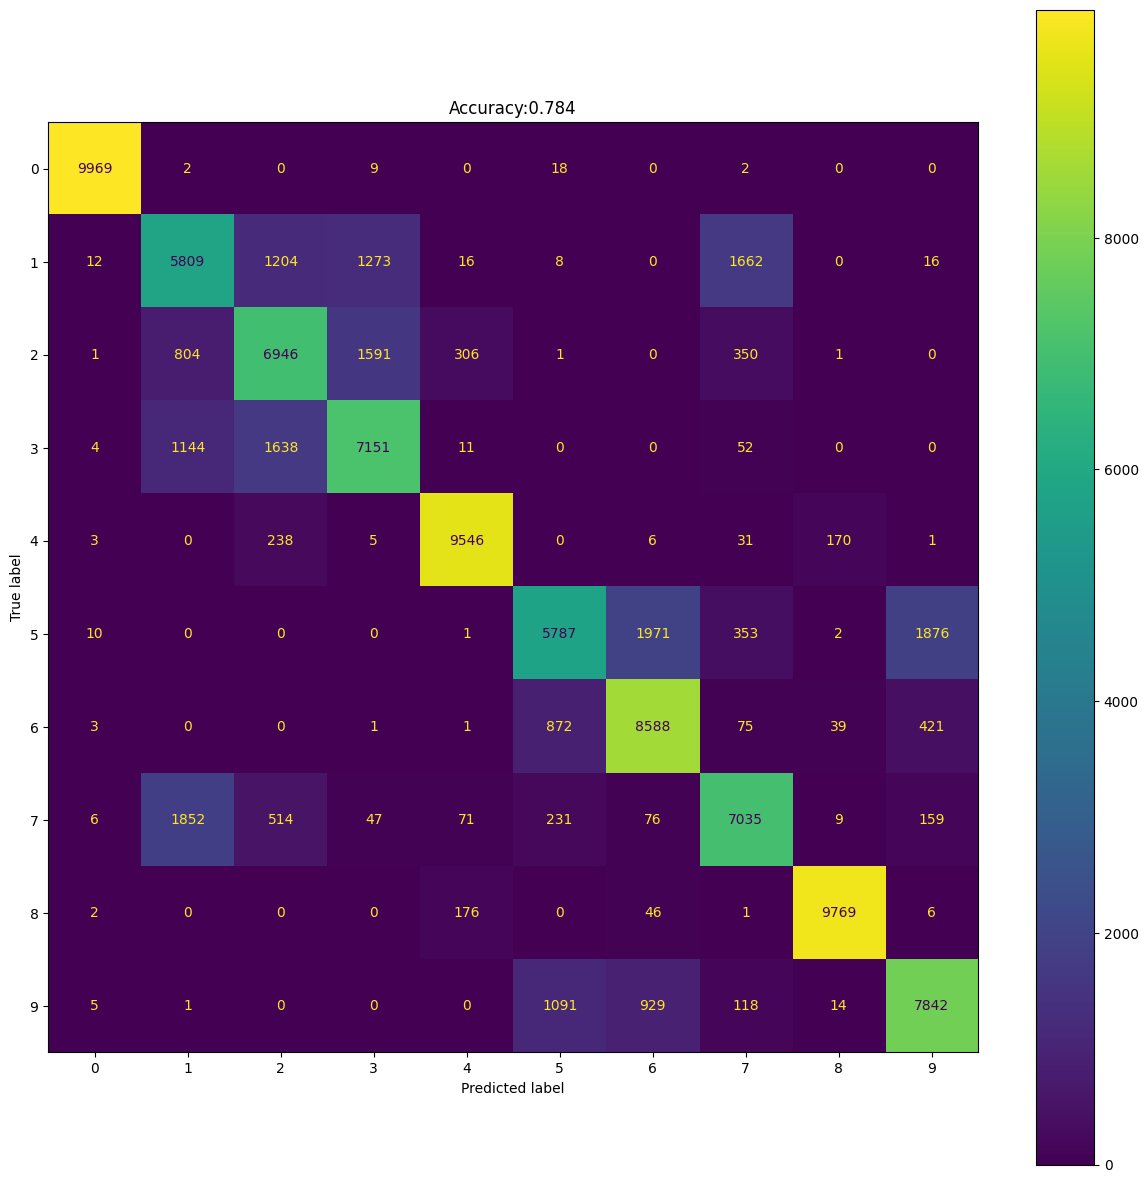

In [60]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_III model

In [61]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [62]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 22.5680 - accuracy: 0.1000
test loss, test acc: [22.56802749633789, 0.09996999800205231]


In [63]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[   0    0    1    0    0    1   17    1 9979    1]
 [   0    0    0    0    1    1    9    1 9988    0]
 [   0    0    0    0    0    1    0    0 9999    0]
 [   0    1    0    1    0    0    4    0 9994    0]
 [   0    1    0    0    0    0    8    1 9989    1]
 [   0    1    0    0    0    0    1    1 9996    1]
 [   0    1    0    1    0    0    0    0 9997    1]
 [   0    0    0    1    0    1    9    0 9989    0]
 [   0    0    0    0    0    0    3    1 9995    1]
 [   0    1    0    0    0    1    5    0 9992    1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.33      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.09997


Text(0.5, 1.0, 'Accuracy:0.100')

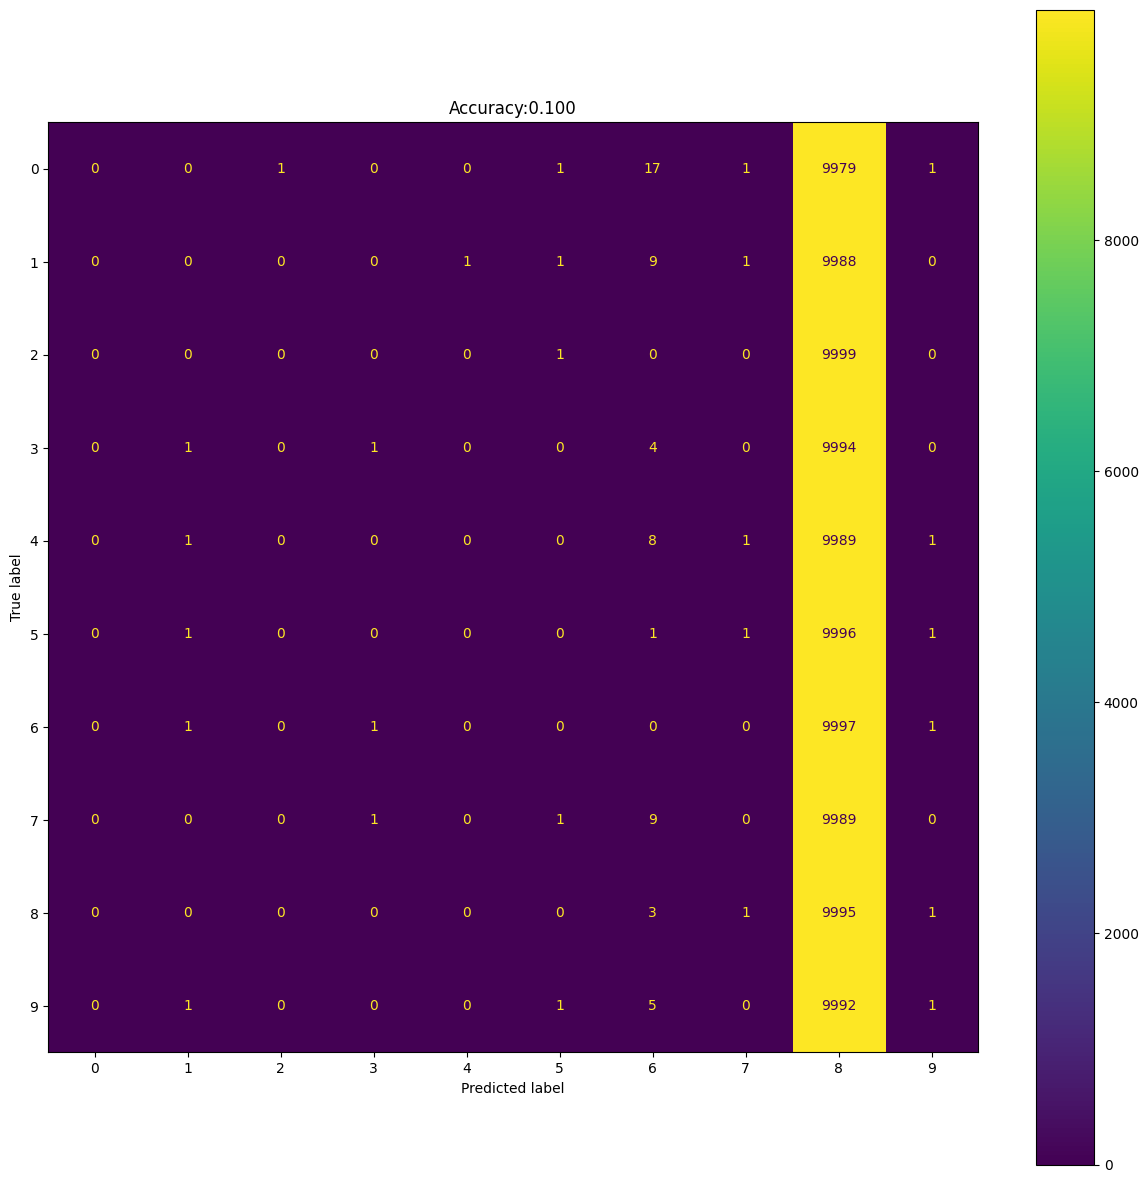

In [64]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [65]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [66]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 2.3883 - accuracy: 0.2165
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.9204 - accuracy: 0.3223
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.7772 - accuracy: 0.3670
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.6817 - accuracy: 0.4072
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.6112 - accuracy: 0.4424
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.5561 - accuracy: 0.4688
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5117 - accuracy: 0.4905
Epoch 8/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.4738 - accuracy: 0.5069
Epoch 9/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.4418 - accuracy: 0.5145
Epoch 10/30
3125/3125 [==============================] - 17s 5ms/step - l

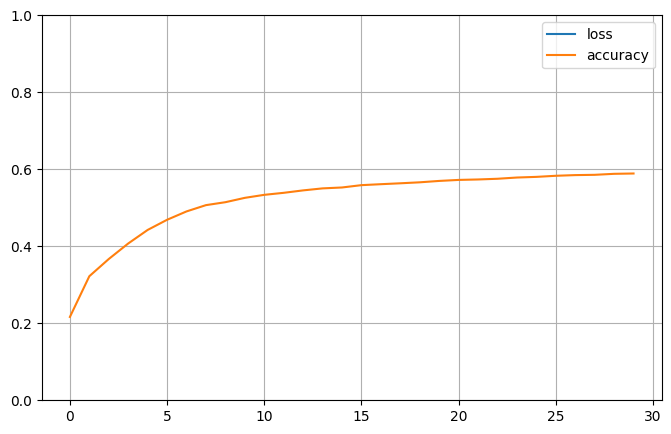

In [67]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [68]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 1.1696 - accuracy: 0.5884
test loss, test acc: [1.1696499586105347, 0.5884000062942505]


In [70]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[9772    4    0   14    0   30  180    0    0    0]
 [   6 3950  886 2669  455   65   31 1046  239  653]
 [   4 1642 3108 2556 1037    7    9  408  903  326]
 [   3 1349  741 6562  620   34   25  312  248  106]
 [   5  369  734  652 3924   41   20  399 3659  197]
 [  53  111    4  160   42 4247 4345  189  307  542]
 [  25   36    4   47   15 1678 7458   53  211  473]
 [   3 1884  365  708  570  186   64 3994  288 1938]
 [   4   44  119   23  687   25   38   41 8874  145]
 [   4  380   84   40   94  356  661  999  431 6951]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10000
           1       0.40      0.40      0.40     10000
           2       0.51      0.31      0.39     10000
           3       0.49      0.66      0.56     10000
           4       0.53      0.39      0.45     10000
           5       0.64      0.42      0.51     10000
           6       0.58      0.7

Test Accuracy:0.5884


Text(0.5, 1.0, 'Accuracy:0.588')

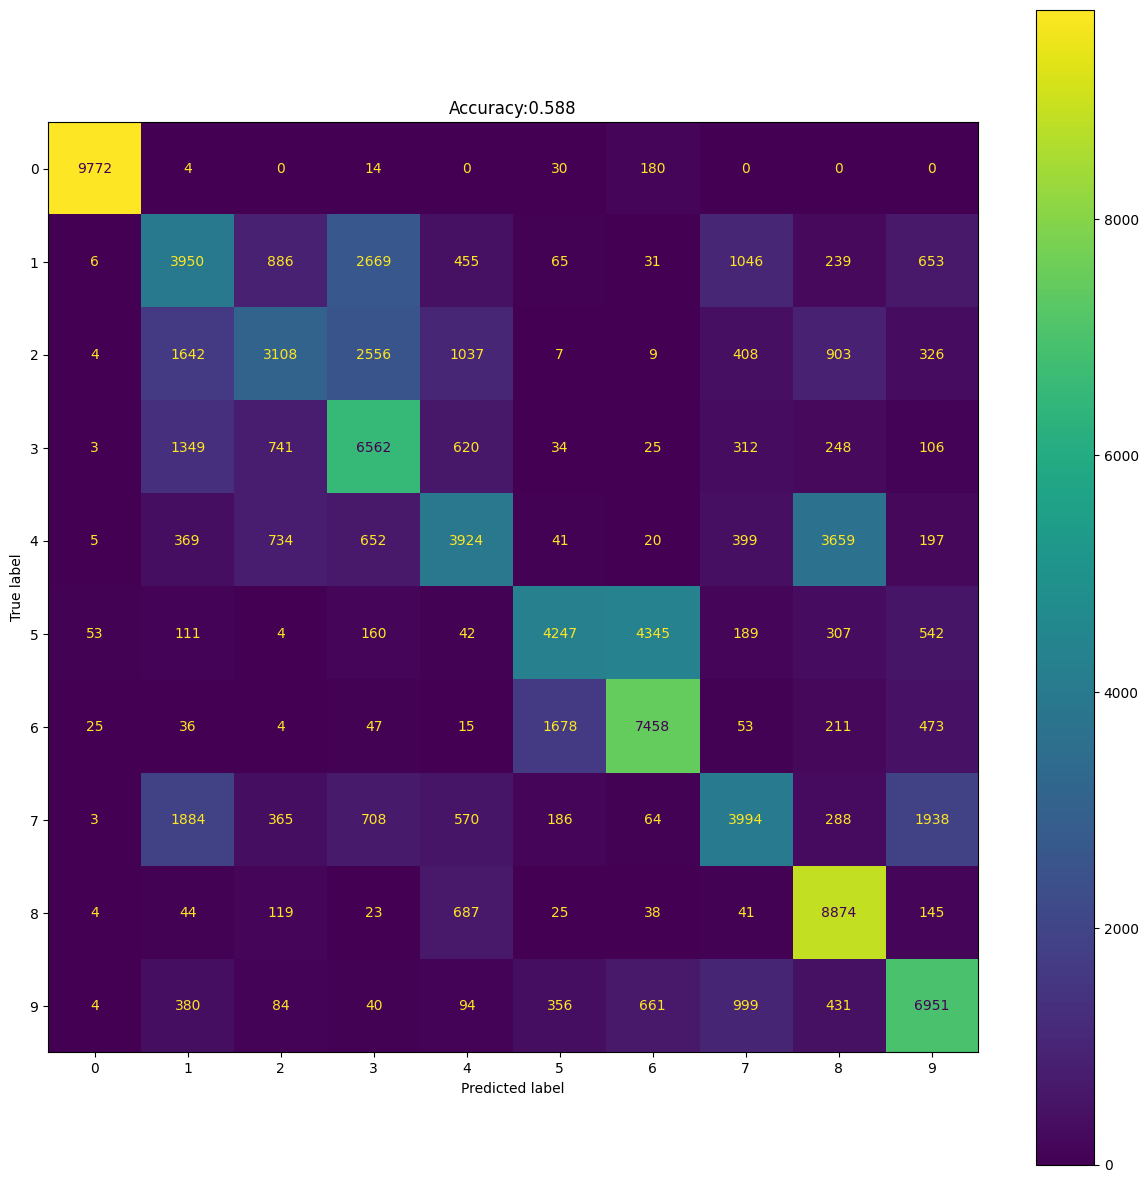

In [71]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')